In [1]:
# import numpy as np
# from scipy.optimize import fsolve, minimize
# import sympy as sp
# import numpy as np
# import matplotlib.pyplot as plt
# import sys
# import warnings
# # %run "classes_ipynb.ipynb"
# sys.path.insert(0, "..")
# import classes2
# warnings.filterwarnings('ignore')



# phis,alfa,pomery,x,koefs,koefh = sp.symbols('phis,alfa,pomery,x,koefs,koefh')
# a=0.15
# b=0.15
# c=0.1
# d=0.1
# model = classes2.SCHR(phis=phis,alfa=alfa,x=x,l0h=0.45,l0s=0.45,a=a,b=b,c=c,d=d)

# xs, xh,xs_np,xh_np = model.geometry_init()
# # Fs,Fh, Us, Uh = model.nonlinear_spring_init(pomery=pomery,koefs=koefs,koefh=koefh,akt_f=True)
# Fs,Fh,Us,Uh = model.thelen_03_muscle_pas_force(pomery=pomery,koefs=koefs,koefh=koefh,akt_f = False)
# u_celk, dU_celk = model.potential_energy(Us,Uh,xs,xh,phis)
# Uc_np, d_Uc_np = model.lambdified(u_celk,dU_celk)

# koefs = 6
# koefh = 5
# # model.graphs_scapula_position(Uc_np, d_Uc_np,koefs=koefs,koefh=koefh,init_root = 0.1)
# model.scapula_position_argmin(Uc_np, koefs, koefh, N=1000)
# # model.graphs_potential_energy(Uc_np)

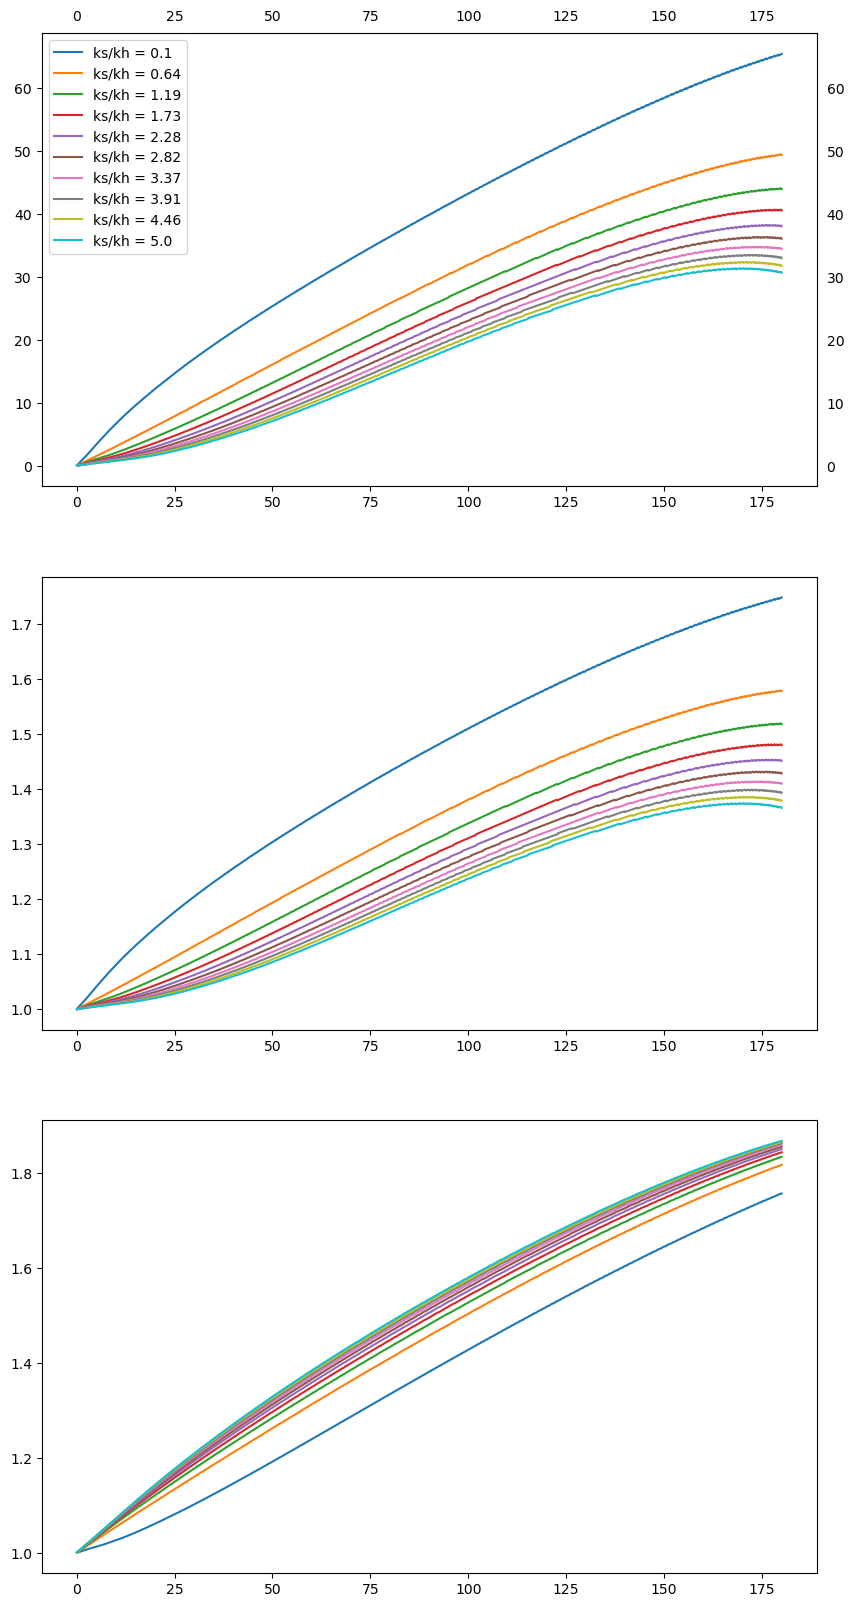

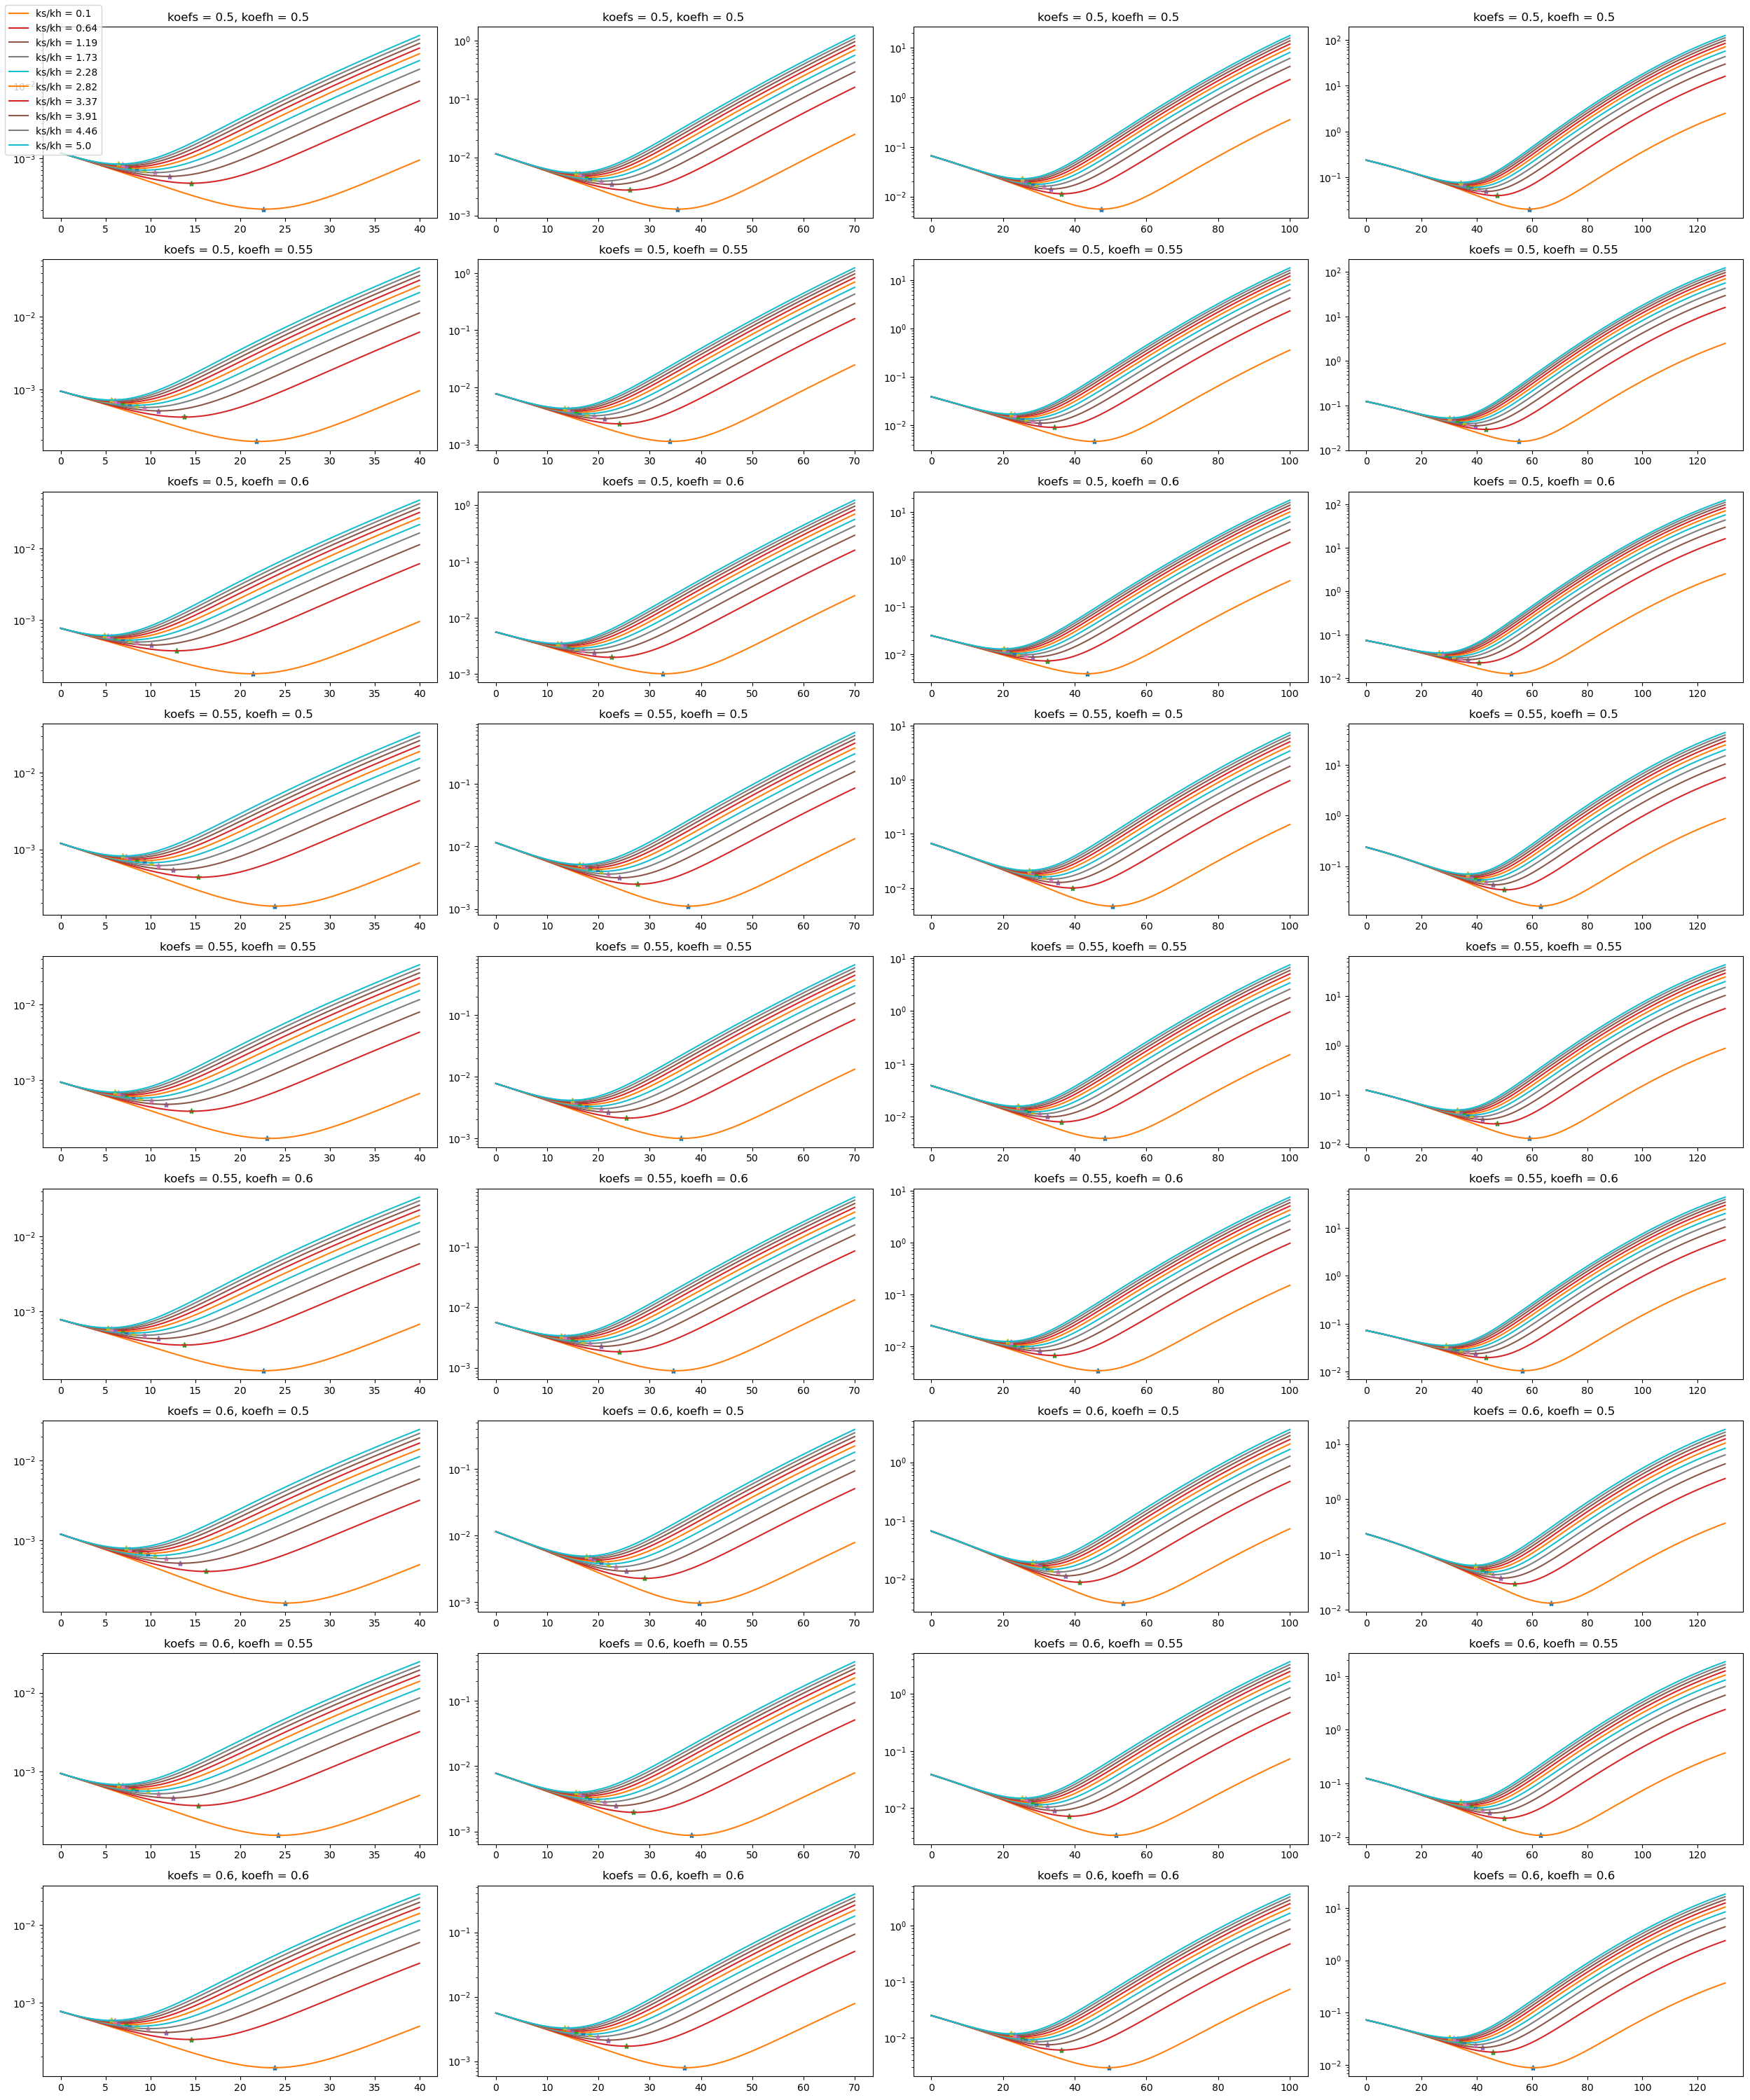

In [20]:
import numpy as np
from scipy.optimize import fsolve, minimize
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings
# %run "classes_ipynb.ipynb"
sys.path.insert(0, "..")
import classes2
warnings.filterwarnings('ignore')



phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h = sp.symbols('phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h')
pomer = 2
a=0.09
b=a
c=a/pomer
d=c

model = classes2.SCHR(phis=phis,alfa=alfa,x=x,l0s=0.13,   l0h=0.1,a=a,b=b,c=c,d=d)
xs, xh,xs_np,xh_np = model.geometry_init(konsts = 0.13,konsth=0.1)
Fs,Fh,Us,Uh = model.thelen_03_muscle_pas_force(pomery=pomery,koefs=koefs,koefh=koefh,epsm0s=epsm0s,epsm0h=epsm0h)
u_celk, dU_celk, Us_sub, Uh_sub = model.potential_energy(Us,Uh,xs,xh,phis)
Uc_np, d_Uc_np, Us_np, Uh_np = model.lambdified(u_celk,dU_celk,Us_sub,Uh_sub)

koefs = 5
koefh = 5
epsm0s = 0.5
epsm0h = 0.6
model.scapula_position_argmin(Uc_np,Us_np, Uh_np,xs_np,xh_np, koefs, koefh, epsm0s,epsm0h, N=1000)
model.graphs_potential_energy(Uc_np)